In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = spark.read.csv('/content/titanic_synthetic_data (1).csv',inferSchema=True, header =True)

In [ ]:
dataset.columns

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex',
 'Survived',
 'Embarked_Q',
 'Embarked_S']

In [ ]:
dataset.describe().select("Pclass","Age","SibSp","Parch","Fare").show()

+------------------+------------------+------------------+------------------+------------------+
|            Pclass|               Age|             SibSp|             Parch|              Fare|
+------------------+------------------+------------------+------------------+------------------+
|           1000000|           1000000|           1000000|           1000000|           1000000|
|          1.999411|         39.517847|          4.500906|          4.497493| 254.9829083944402|
|0.8168263709530482|23.092708389398037|2.8714427426552285|2.8728101169393594|141.53963219142216|
|                 1|                 0|                 0|                 0|10.000191449724019|
|                 3|                79|                 9|                 9| 499.9999338139367|
+------------------+------------------+------------------+------------------+------------------+



In [ ]:
dataset.describe().select("Sex","Survived","Embarked_Q","Embarked_S").show()

+------------------+------------------+-------------------+------------------+
|               Sex|          Survived|         Embarked_Q|        Embarked_S|
+------------------+------------------+-------------------+------------------+
|           1000000|           1000000|            1000000|           1000000|
|           0.50082|           0.49987|           0.332717|          0.333661|
|0.4999995775993916|0.5000002331001768|0.47118639616145436|0.4715204761307361|
|                 0|                 0|                  0|                 0|
|                 1|                 1|                  1|                 1|
+------------------+------------------+-------------------+------------------+



In [ ]:
from pyspark.sql.functions import col,isnan, when, count
dataset.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dataset.columns]
   ).show()

+------+---+-----+-----+----+---+--------+----------+----------+
|Pclass|Age|SibSp|Parch|Fare|Sex|Survived|Embarked_Q|Embarked_S|
+------+---+-----+-----+----+---+--------+----------+----------+
|     0|  0|    0|    0|   0|  0|       0|         0|         0|
+------+---+-----+-----+----+---+--------+----------+----------+



In [ ]:

#impute
from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=["Pclass","Age","SibSp","Parch","Fare","Sex","Survived","Embarked_Q","Embarked_S"],outputCols=["Pclass","Age","SibSp","Parch","Fare","Sex","Survived","Embarked_Q","Embarked_S"])
model=imputer.fit(dataset)
dataset=model.transform(dataset)
dataset.show(5)

+------+---+-----+-----+------------------+---+--------+----------+----------+
|Pclass|Age|SibSp|Parch|              Fare|Sex|Survived|Embarked_Q|Embarked_S|
+------+---+-----+-----+------------------+---+--------+----------+----------+
|     3| 42|    6|    7|397.00178367782024|  0|       0|         0|         1|
|     1| 52|    6|    7|302.12770032784186|  0|       0|         1|         0|
|     3| 25|    3|    8| 427.1058765283985|  1|       1|         1|         0|
|     3| 32|    9|    7| 326.8049924602327|  1|       0|         0|         0|
|     1| 40|    0|    5|17.718838497771657|  0|       0|         0|         0|
+------+---+-----+-----+------------------+---+--------+----------+----------+
only showing top 5 rows



In [ ]:
#us combine all the features in one single feature vector.
cols=dataset.columns
cols.remove("Survived")
cols.remove("Fare")
# Let us import the vector assembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=cols,outputCol="features")
# Now let us use the transform method to transform our dataset
dataset=assembler.transform(dataset)
dataset.select("features").show(truncate=False)

+------------------------------+
|features                      |
+------------------------------+
|[3.0,42.0,6.0,7.0,0.0,0.0,1.0]|
|[1.0,52.0,6.0,7.0,0.0,1.0,0.0]|
|[3.0,25.0,3.0,8.0,1.0,1.0,0.0]|
|[3.0,32.0,9.0,7.0,1.0,0.0,0.0]|
|(7,[0,1,3],[1.0,40.0,5.0])    |
|[1.0,20.0,7.0,2.0,0.0,0.0,0.0]|
|[3.0,76.0,4.0,9.0,0.0,1.0,0.0]|
|[2.0,22.0,4.0,7.0,1.0,0.0,0.0]|
|[3.0,78.0,4.0,8.0,1.0,0.0,0.0]|
|[3.0,15.0,1.0,8.0,1.0,1.0,0.0]|
|[3.0,68.0,8.0,7.0,1.0,0.0,1.0]|
|[3.0,3.0,7.0,1.0,0.0,1.0,0.0] |
|[1.0,63.0,4.0,0.0,1.0,0.0,0.0]|
|[3.0,0.0,9.0,8.0,0.0,0.0,1.0] |
|[2.0,62.0,3.0,4.0,1.0,0.0,0.0]|
|[1.0,41.0,2.0,8.0,1.0,0.0,1.0]|
|[2.0,40.0,4.0,2.0,1.0,0.0,1.0]|
|[2.0,64.0,0.0,4.0,0.0,0.0,1.0]|
|[2.0,67.0,3.0,6.0,0.0,0.0,0.0]|
|[2.0,35.0,0.0,1.0,1.0,0.0,0.0]|
+------------------------------+
only showing top 20 rows



In [ ]:
#Standard Sclarizer
from pyspark.ml.feature import StandardScaler
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
dataset=standardscaler.fit(dataset).transform(dataset)
dataset.select("features","Scaled_features").show(5)

+--------------------+--------------------+
|            features|     Scaled_features|
+--------------------+--------------------+
|[3.0,42.0,6.0,7.0...|[3.67275115824148...|
|[1.0,52.0,6.0,7.0...|[1.22425038608049...|
|[3.0,25.0,3.0,8.0...|[3.67275115824148...|
|[3.0,32.0,9.0,7.0...|[3.67275115824148...|
|(7,[0,1,3],[1.0,4...|(7,[0,1,3],[1.224...|
+--------------------+--------------------+
only showing top 5 rows



In [ ]:

# convert categorical column into numbers
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol = 'sex', outputCol = 'gender')
#df = indexer.fit(df).transform(df)
#df.show(30)

In [ ]:
#Standard Sclarizer
#The scaling has already been done in a previous cell.
#Displaying the features and scaled features.
dataset.select("features","Scaled_features").show(5)

+--------------------+--------------------+
|            features|     Scaled_features|
+--------------------+--------------------+
|[3.0,42.0,6.0,7.0...|[3.67275115824148...|
|[1.0,52.0,6.0,7.0...|[1.22425038608049...|
|[3.0,25.0,3.0,8.0...|[3.67275115824148...|
|[3.0,32.0,9.0,7.0...|[3.67275115824148...|
|(7,[0,1,3],[1.0,4...|(7,[0,1,3],[1.224...|
+--------------------+--------------------+
only showing top 5 rows



In [ ]:
#Train, test split
train, test = dataset.randomSplit([0.8, 0.2], seed=12345)

In [ ]:
#imbalance in the dataset, observe the use of Where
dataset_size=float(train.select("Embarked_S").count())
numPositives=train.select("Embarked_S").where('Embarked_S== 1').count()
per_ones=(float(numPositives)/float(dataset_size))*100
numNegatives=float(dataset_size-numPositives)
print('The number of ones are {}'.format(numPositives))
print('Percentage of ones are {}'.format(per_ones))

The number of ones are 267042
Percentage of ones are 33.37007212800096


In [ ]:
BalancingRatio= numNegatives/dataset_size
print('BalancingRatio = {}'.format(BalancingRatio))

BalancingRatio = 0.6662992787199904


In [ ]:
# balance
train=train.withColumn("classWeights", when(train.Survived == 1,BalancingRatio).otherwise(1-BalancingRatio))
train.select("classWeights").show(5)

+------------------+
|      classWeights|
+------------------+
|0.3337007212800096|
|0.3337007212800096|
|0.6662992787199904|
|0.6662992787199904|
|0.6662992787199904|
+------------------+
only showing top 5 rows



In [ ]:
 #Feature selection
# Feature selection using chisquareSelector
from pyspark.ml.feature import ChiSqSelector
css = ChiSqSelector(featuresCol='Scaled_features',outputCol='Aspect',labelCol='Embarked_S',fpr=0.05)
train=css.fit(train).transform(train)
test=css.fit(test).transform(test)
test.select("Aspect").show(5,truncate=False)

+-----------------------------------------------------------------------+
|Aspect                                                                 |
+-----------------------------------------------------------------------+
|(7,[0,4,5],[1.2242503860804963,2.0000016896038306,2.1223023587831746]) |
|(7,[0,3,5],[1.2242503860804963,0.34809122750702337,2.1223023587831746])|
|(7,[0,3,6],[1.2242503860804963,0.34809122750702337,2.120798672850694]) |
|(7,[0,3,4],[1.2242503860804963,0.34809122750702337,2.0000016896038306])|
|(7,[0,3],[1.2242503860804963,0.34809122750702337])                     |
+-----------------------------------------------------------------------+
only showing top 5 rows



In [ ]:
#Building a classification model using Logistic Regression (LR)
from pyspark.ml.classification import LogisticRegression

# Select the necessary columns for Logistic Regression
train_for_lr = train.select("Survived", "Aspect", "classWeights")
test_for_lr = test.select("Survived", "Aspect") # classWeights is not needed for prediction

lr = LogisticRegression(labelCol="Survived", featuresCol="Aspect",weightCol="classWeights",maxIter=10)
model=lr.fit(train_for_lr) # Fit on the DataFrame with selected columns
predict_train=model.transform(train_for_lr)
predict_test=model.transform(test_for_lr)
predict_test.select("Survived","prediction").show(10)

+--------+----------+
|Survived|prediction|
+--------+----------+
|       0|       1.0|
|       0|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
|       0|       1.0|
|       0|       1.0|
|       1|       1.0|
|       1|       1.0|
|       1|       1.0|
+--------+----------+
only showing top 10 rows



In [ ]:
#Evaluating the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator=BinaryClassificationEvaluator(rawPredictionCol='rawPrediction',labelCol="Survived")
# We have only two choices: area under ROC and PR curves :-(
auroc = evaluator.evaluate(predict_test, {evaluator.metricName: "areaUnderROC"})

print("Area under ROC Curve: {:.4f}".format(auroc))

# Note: The 'Outcome' column does not exist in predict_test.
# Displaying 'Survived', 'prediction', and 'probability' instead.
predict_test.select("Survived","prediction","probability").show(15)

Area under ROC Curve: 0.5000
+--------+----------+--------------------+
|Survived|prediction|         probability|
+--------+----------+--------------------+
|       0|       1.0|[0.33620588319582...|
|       0|       1.0|[0.33540299766233...|
|       1|       1.0|[0.33455201079893...|
|       1|       1.0|[0.33570750353833...|
|       1|       1.0|[0.33492347724148...|
|       0|       1.0|[0.33568921281157...|
|       0|       1.0|[0.33531732527594...|
|       1|       1.0|[0.33615097225607...|
|       1|       1.0|[0.33534815160660...|
|       1|       1.0|[0.33613266959330...|
|       1|       1.0|[0.33534815160660...|
|       1|       1.0|[0.33532987057550...|
|       0|       1.0|[0.33563434358940...|
|       0|       1.0|[0.33532987057550...|
|       1|       1.0|[0.33611436742252...|
+--------+----------+--------------------+
only showing top 15 rows



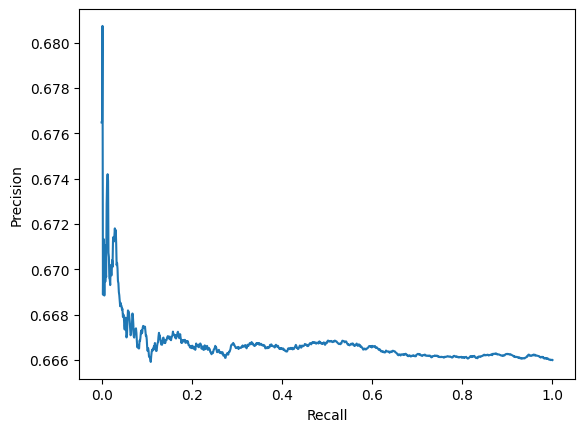

Model Accuracy 0.6659958020796684
FP rate [0.0, 1.0]
TR rate [0.0, 1.0]


In [ ]:
print(model.summary)
import matplotlib.pyplot as plt
pr = model.summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
print("Model Accuracy",model.summary.accuracy)
print("FP rate",model.summary.falsePositiveRateByLabel)
print("TR rate",model.summary.truePositiveRateByLabel)

In [ ]:
# Calculate confusion matrix components using Spark DataFrame operations
tp = predict_test.filter("Survived = 1 AND prediction = 1").count()
fp = predict_test.filter("Survived = 0 AND prediction = 1").count()
tn = predict_test.filter("Survived = 0 AND prediction = 0").count()
fn = predict_test.filter("Survived = 1 AND prediction = 0").count()

print("Confusion Matrix:")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Optional: Calculate Precision, Recall, F1-Score from these values
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Confusion Matrix:
True Positives (TP): 100021
False Positives (FP): 99735
True Negatives (TN): 0
False Negatives (FN): 0

Precision: 0.5007
Recall: 1.0000
F1-Score: 0.6673


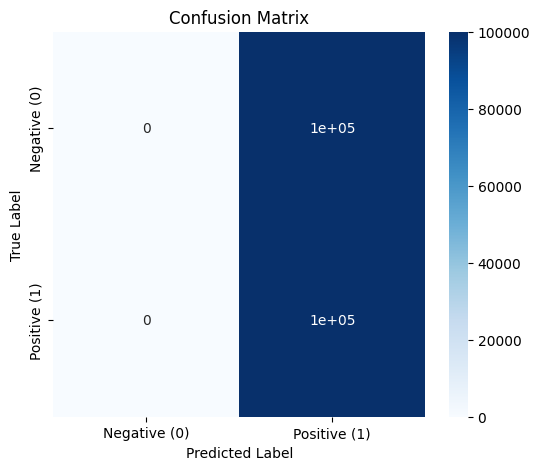

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

TN = tn
FP = fp
FN = fn
TP = tp
conf_matrix = np.array([[TN, FP],
                        [FN, TP]])
labels = ["Negative (0)", "Positive (1)"]

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True,  cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1_score:.4f}")

Precision: 0.5007
Recall:    1.0000
F1-score:  0.6673


The Titanic Dataset is used here for binary classification and I have performed the data analysis to check if the data is imbalance  and apply the imbalance remedy. I got the BalancingRatio = 0.6662992787199904.
Model Accuracy 0.6659958020796684
FP rate [0.0, 1.0]
TR rate [0.0, 1.0]

Confusion Matrix:
True Positives (TP): 100021
False Positives (FP): 99735
True Negatives (TN): 0
False Negatives (FN): 0

Precision: 0.5007
Recall: 1.0000
F1-Score: 0.6673
